# Image classification à l’aide du Deep Learning
### Utilisant le transfer learning
Model capable de classer les images en fonction de la race du chien

Huggingface model
model="prithivMLmods/Dog-Breed-120"
https://huggingface.co/prithivMLmods/Dog-Breed-120?library=transformers

Read model documentation
https://huggingface.co/docs/transformers/main/en/model_doc/siglip#transformers.SiglipForImageClassification

Read docs on high-level-pipeline
https://huggingface.co/docs/transformers/main_classes/pipelines


In [1]:
# Install if not installed already
!pip install transformers

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.3 MB 18.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.3 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.3 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 17.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/558.8 kB ? eta -:--:--
   --------------------------------------- 558.8/558.8 kB 19.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 15.9 MB/s eta 0:00:00


In [22]:
# Imports
from transformers import pipeline
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
# Use a pipeline as a high-level helper
pipe = pipeline("image-classification", model="prithivMLmods/Dog-Breed-120")

Device set to use cpu


In [24]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("prithivMLmods/Dog-Breed-120")
model = AutoModelForImageClassification.from_pretrained("prithivMLmods/Dog-Breed-120")


In [36]:
# get image according to it's path(http, https or local)
def get_image(url):
    if url.lower().startswith("http"):
        print("URL detected — use requests")
        image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
        # handle URL logic here
    else:
        print("Local path detected — use Image.open() directly")
        image = Image.open(url).convert("RGB")
        # handle local file logic here
    return image


# Display results: Image, bar chart, pie chart
def display_results(image, predictions):
    labels = [item["label"] for item in predictions]
    scores = [item["score"] for item in predictions]

    # Show image
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    # plt.axis('off')
    plt.title("Input Image")

    # Bar chart
    plt.subplot(1, 3, 2)
    plt.barh(labels, scores)
    plt.title("Top Predictions (Bar)")
    plt.xlabel("Probability")

    # Pie chart
    plt.subplot(1, 3, 3)
    plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Top Predictions (Pie)")

    plt.tight_layout()
    plt.show()

# Display image with predictions next to it
def display_image_with_predictions(image, predictions):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(image)
    # ax.axis("off")

    # Draw predicted classes next to image (right side)
    x_text = image.width + 10
    y_text = 20
    for pred in predictions:
        label = pred["label"]
        score = pred["score"]
        plt.text(
            image.width + 20,
            y_text,
            f"{label}: {score:.2%}",
            fontsize=12,
            color='blue',
            va='top'
        )
        y_text += 20

    # Expand canvas to make room for text
    fig.subplots_adjust(right=0.6)
    plt.title("Image with Top 3 Predictions")
    plt.show()

#### How to use?
Give the image path + run and it'll predict the three possibilities of dog breed with more than 80% of accuracy.

It'll also show the bar chart and pie chart

Local path detected — use Image.open() directly


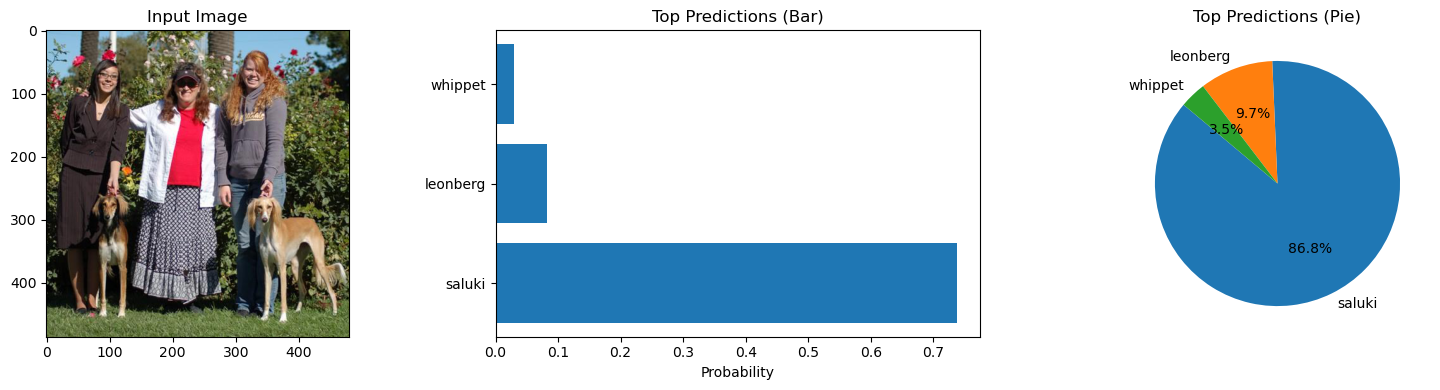

In [37]:
# 🐶 Example
# Load image
# Use a local path
# path = r"C:\Users\Kalyan\Downloads\images\Images\n02085620-Chihuahua\n02085620_8558.jpg"
# Or use a URL:
path = "https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcSFlzhEYNYIQZW1jVxS425hTUYg34s7QGYGkgJuTO_uaj_0cB6TqRrnQM1Q3Sg1IF3LaXd-hBU6V9aI7TJgJR59naVsI1r7OjpC_tyldSkS"

image = get_image(path)
predictions = pipe(image, top_k=3)  # Top 3 predictions
display_results(image, predictions)

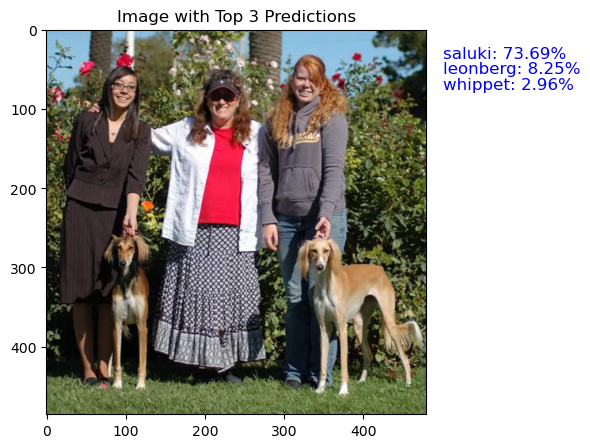

In [38]:
display_image_with_predictions(image, predictions)